<a href="https://colab.research.google.com/github/iamlorddanny/Mr.HelpMate-Assistant-Upgrad-Myntra-Fashion-Data/blob/main/Helpmate_assistant_Prakash%20DannySagar_MyntraFashion%20data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tiktoken openai chromadb sentence_transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.1 MB/s eta 0:0

In [ ]:

from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import openai
from sentence_transformers import CrossEncoder, util
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
import chromadb

In [ ]:
!pip install kagglehub[pandas-datasets] --upgrade

import kagglehub
from kagglehub import KaggleDatasetAdapter


In [ ]:


# Download latest version
base_path = kagglehub.dataset_download("djagatiya/myntra-fashion-product-dataset")

print("Path to dataset files:", base_path)

100%|██████████| 2.84G/2.84G [00:37<00:00, 81.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/djagatiya/myntra-fashion-product-dataset/versions/1


In [ ]:
import os
import pandas as pd

# Path where Kaggle mounts the dataset
new_path = "/root/.cache/kagglehub/datasets/djagatiya/myntra-fashion-product-dataset/versions/1"



# Step 1: Listing all files in the dataset folder
files = os.listdir(new_path)
print("📂 Files in dataset:", files)

# Step 2: Try to pick the first CSV file automatically
csv_files = [f for f in files if f.lower().endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV files found in the dataset folder. Check the file list above.")

file_path = os.path.join(new_path, csv_files[0])
print(f"✅ Using file: {file_path}")

# Step 3: Load CSV into Pandas
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())



📂 Files in dataset: ['Fashion Dataset v2.csv', 'images']
✅ Using file: /root/.cache/kagglehub/datasets/djagatiya/myntra-fashion-product-dataset/versions/1/Fashion Dataset v2.csv
✅ Data loaded successfully!
Shape: (14214, 11)

First 5 rows:
        p_id                                               name  \
0  17048614  Khushal K Women Black Ethnic Motifs Printed Ku...   
1  16524740  InWeave Women Orange Solid Kurta with Palazzos...   
2  16331376  Anubhutee Women Navy Blue Ethnic Motifs Embroi...   
3  14709966  Nayo Women Red Floral Printed Kurta With Trous...   
4  11056154   AHIKA Women Black & Green Printed Straight Kurta   

                                products   price     colour      brand  \
0               Kurta, Palazzos, Dupatta  5099.0      Black  Khushal K   
1  Kurta, Palazzos, Floral Print Dupatta  5899.0     Orange    InWeave   
2               Kurta, Trousers, Dupatta  4899.0  Navy Blue  Anubhutee   
3                Kurta, Trouser, Dupatta  3699.0        Red       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# Basic info
print(" Dataset Shape:", df.shape)
print("\n Columns:", df.columns.tolist())
print("\n Info:")
print(df.info())
print("\n Missing Values:\n", df.isna().sum())




 Dataset Shape: (14214, 11)

 Columns: ['p_id', 'name', 'products', 'price', 'colour', 'brand', 'img', 'ratingCount', 'avg_rating', 'description', 'p_attributes']

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14214 non-null  int64  
 1   name          14214 non-null  object 
 2   products      14214 non-null  object 
 3   price         14214 non-null  float64
 4   colour        14214 non-null  object 
 5   brand         14214 non-null  object 
 6   img           14214 non-null  object 
 7   ratingCount   6530 non-null   float64
 8   avg_rating    6530 non-null   float64
 9   description   14214 non-null  object 
 10  p_attributes  14214 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB
None

 Missing Values:
 p_id               0
name               0
products           0
price       

In [ ]:

# Summary stats
print("\n📈 Summary Stats:")
print(df.describe(include="all").transpose())




📈 Summary Stats:
                count unique  \
p_id          14214.0    NaN   
name            14214  13873   
products        14214    910   
price         14214.0    NaN   
colour          14214     50   
brand           14214   1022   
img             14214  14214   
ratingCount    6530.0    NaN   
avg_rating     6530.0    NaN   
description     14214  14181   
p_attributes    14214  13089   

                                                            top  freq  \
p_id                                                        NaN   NaN   
name                        SCORPIOUS Women Pack of Shrug & Top    10   
products                                                  Jeans   941   
price                                                       NaN   NaN   
colour                                                    Black  1901   
brand                                                  Roadster   346   
img           http://assets.myntassets.com/assets/images/163...     1   
ratingCount  

/tmp/ipython-input-1454038430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


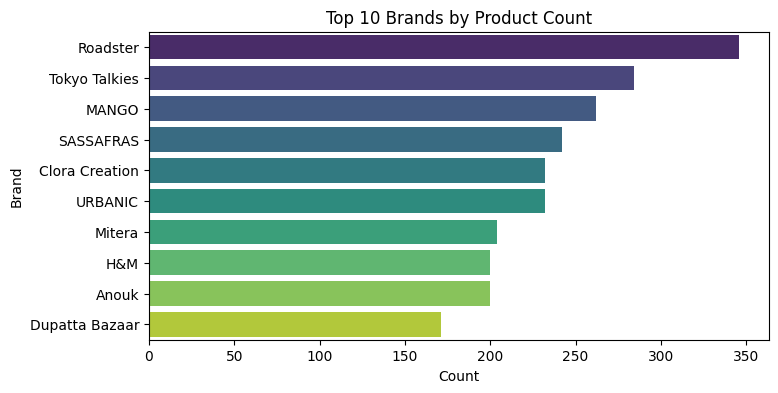

In [ ]:
# Top brands
top_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

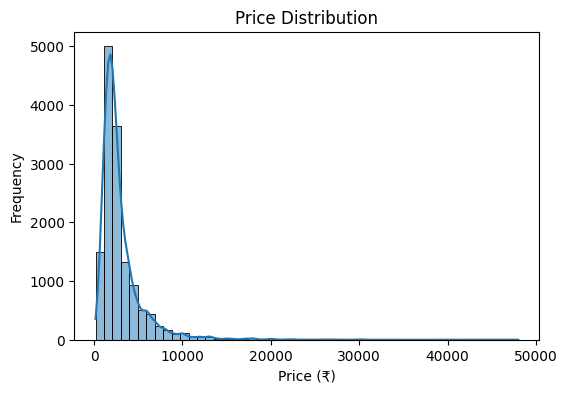

In [ ]:
# Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['price'].dropna(), bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()



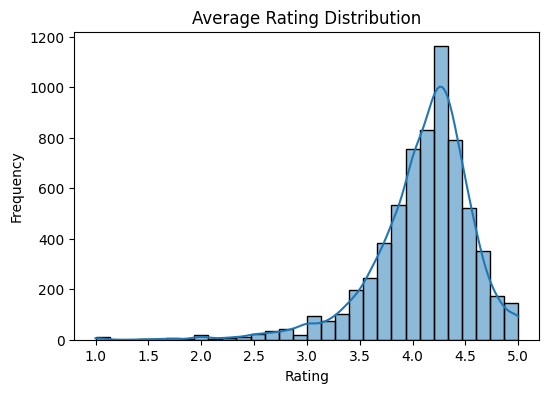

In [ ]:
# Rating distribution
plt.figure(figsize=(6,4))
sns.histplot(df['avg_rating'].dropna(), bins=30, kde=True)
plt.title("Average Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Install deps (if not done yet)
!pip -q install sentence-transformers chromadb

import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

#  Step 1: Clean the dataset
def clean_dataset(df):
    # Drop rows missing important fields
    df = df.dropna(subset=['name', 'description', 'price', 'brand']).reset_index(drop=True)

    # Convert price to numeric
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df = df.dropna(subset=['price'])

    # Combine useful text fields for embeddings
    df['text'] = (
        df['name'].astype(str) + " " +
        df['description'].astype(str) + " " +
        df['brand'].astype(str) + " " +
        df['colour'].astype(str)
    )
    return df

df_clean = clean_dataset(df)
print(" Cleaned dataset shape:", df_clean.shape)
print(df_clean[['name', 'brand', 'colour', 'price']].head())


 Cleaned dataset shape: (14214, 12)
                                                name      brand     colour  \
0  Khushal K Women Black Ethnic Motifs Printed Ku...  Khushal K      Black   
1  InWeave Women Orange Solid Kurta with Palazzos...    InWeave     Orange   
2  Anubhutee Women Navy Blue Ethnic Motifs Embroi...  Anubhutee  Navy Blue   
3  Nayo Women Red Floral Printed Kurta With Trous...       Nayo        Red   
4   AHIKA Women Black & Green Printed Straight Kurta      AHIKA      Black   

    price  
0  5099.0  
1  5899.0  
2  4899.0  
3  3699.0  
4  1350.0  


In [ ]:
# Step 2: Load embedding model (lightweight for Colab)
embed_model_name = "all-MiniLM-L6-v2"
embedder = SentenceTransformer(embed_model_name)
embedding_fn = SentenceTransformerEmbeddingFunction(model_name=embed_model_name)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:

# Step 3: Create ChromaDB collection
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name="myntra_fashion",
    embedding_function=embedding_fn
)



In [ ]:
# Step 4: Add products with embeddings in batches
batch_size = 5000  # Choose a batch size less than the max (5461)
total_items = len(df_clean)

for i in range(0, total_items, batch_size):
    batch_df = df_clean.iloc[i : i + batch_size]
    collection.add(
        ids=[str(j) for j in batch_df.index],
        documents=batch_df['text'].tolist(),
        metadatas=batch_df[['name','brand','colour','price','img']].to_dict(orient="records")
    )
    print(f"Added batch {i // batch_size + 1}/{(total_items + batch_size - 1) // batch_size}")


print("✅ Collection built with", collection.count(), "items")

Added batch 1/3
Added batch 2/3
Added batch 3/3
✅ Collection built with 14214 items


In [ ]:
# ✅ Step 5: Recommendation function
def recommend(query, n=5):
    results = collection.query(query_texts=[query], n_results=n)

    recs = []
    for meta in results['metadatas'][0]:
        recs.append({
            "name": meta['name'],
            "brand": meta['brand'],
            "colour": meta['colour'],
            "price": meta['price'],
            "image": meta['img']
        })
    return pd.DataFrame(recs)

# Test usage
recommend("Red floral kurta", n=5)


,name,brand,colour,price,image
0,Anouk Women Red Floral Print A-Line Kurta,Anouk,Red,1699.0,http://assets.myntassets.com/assets/images/776...
1,House of Pataudi Women Purple & Gold-Toned Emb...,House of Pataudi,Purple,5999.0,http://assets.myntassets.com/assets/images/110...
2,Ahalyaa Women Beige Floral Printed Regular Got...,Ahalyaa,Beige,6000.0,http://assets.myntassets.com/assets/images/149...
3,Bhama Couture Women Red Solid Kurta with Palazzos,Bhama Couture,Red,3599.0,http://assets.myntassets.com/assets/images/981...
4,Tissu Women Green & Pink Floral Printed Kurti,Tissu,Green,999.0,http://assets.myntassets.com/assets/images/pro...


In [23]:
from IPython.display import HTML

def recommend_1(query, n=5):
    results = collection.query(query_texts=[query], n_results=n)

    recs = []
    for meta in results['metadatas'][0]:
        recs.append({
            "name": meta['name'],
            "brand": meta['brand'],
            "colour": meta['colour'],
            "price": meta['price'],
            "image": f"<img src='{meta['img']}' width='120'/>"
        })

    # Render images as HTML inside DataFrame
    df = pd.DataFrame(recs)
    return HTML(df.to_html(escape=False))

# Test usage
recommend_1("Red floral kurta", n=5)



,name,brand,colour,price,image
0,Anouk Women Red Floral Print A-Line Kurta,Anouk,Red,1699.0,
1,Indo Era Women Red Floral Printed Empire Kurta with Trousers & With Dupatta,Indo Era,Red,5999.0,
2,HERE&NOW Pink & Red Floral Printed Kurti,HERE&NOW,Pink,1299.0,
3,W Women Pink & Green Floral Printed Kurta,W,Pink,1799.0,
4,Bhama Couture Women Red Solid Kurta with Palazzos,Bhama Couture,Red,3599.0,


## Creating Generative Search System

In [ ]:
!pip -q install --upgrade sentence-transformers chromadb tiktoken openai

import os, json, math, re
import pandas as pd
from typing import List, Dict, Any, Optional

from sentence_transformers import SentenceTransformer, CrossEncoder, util
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

# Optional: OpenAI for generation (set your key if you want LLM answers)
import tiktoken
try:
    from openai import OpenAI
    OPENAI_ENABLED = True
except Exception:
    OPENAI_ENABLED = False

print("✅ Setup OK")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 951.0/951.0 kB 15.2 MB/s eta 0:00:00
✅ Setup OK


### Loading Data set

In [ ]:
# If you already have `df`, skip this block or let it pass.
# Otherwise, load from the Kaggle mount:

print(df.shape)
df.head(5)


(14214, 11)


,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,14709966,Nayo Women Red Floral Printed Kurta With Trous...,"Kurta, Trouser, Dupatta",3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,11056154,AHIKA Women Black & Green Printed Straight Kurta,Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


### Preprocessing

In [ ]:
def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:
    dfc = df.copy()

    # Make sure expected columns exist
    for col in ["name","description","brand","colour","price","img","p_id","products"]:
        if col not in dfc.columns:
            dfc[col] = None

    # Drop rows missing core info
    dfc = dfc.dropna(subset=["name","description","brand"]).reset_index(drop=True)

    # Numeric price
    dfc["price"] = pd.to_numeric(dfc["price"], errors="coerce")
    dfc = dfc.dropna(subset=["price"])

    # Normalize a few fields
    dfc["colour"] = dfc["colour"].fillna("").astype(str)
    dfc["brand"]  = dfc["brand"].fillna("").astype(str)
    dfc["name"]   = dfc["name"].astype(str)
    dfc["description"] = dfc["description"].astype(str)

    # Build a single text field for embeddings
    dfc["text"] = (
        "Name: " + dfc["name"] + " | " +
        "Brand: " + dfc["brand"] + " | " +
        "Colour: " + dfc["colour"] + " | " +
        "Price: ₹" + dfc["price"].astype(int).astype(str) + " | " +
        "Details: " + dfc["description"].str.replace(r"<br>|<.*?>", " ", regex=True)
    )

    return dfc

df_clean = clean_dataset(df)
print("✅ Cleaned:", df_clean.shape)
df_clean[["name","brand","colour","price"]].head()


✅ Cleaned: (14214, 12)


,name,brand,colour,price
0,Khushal K Women Black Ethnic Motifs Printed Ku...,Khushal K,Black,5099.0
1,InWeave Women Orange Solid Kurta with Palazzos...,InWeave,Orange,5899.0
2,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,Anubhutee,Navy Blue,4899.0
3,Nayo Women Red Floral Printed Kurta With Trous...,Nayo,Red,3699.0
4,AHIKA Women Black & Green Printed Straight Kurta,AHIKA,Black,1350.0


### Build the vector index (Chroma + SentenceTransformer)

In [ ]:
# Lightweight, solid general-purpose model
EMBED_MODEL = "all-MiniLM-L6-v2"
embedder = SentenceTransformer(EMBED_MODEL)
embed_fn = SentenceTransformerEmbeddingFunction(model_name=EMBED_MODEL)

# Fresh in-memory Chroma
chroma_client = chromadb.Client()
if "myntra_gen_search" in [c.name for c in chroma_client.list_collections()]:
    chroma_client.delete_collection("myntra_gen_search")

collection = chroma_client.create_collection(
    name="myntra_gen_search",
    embedding_function=embed_fn
)

# Add items (use stable string ids)
docs = df_clean["text"].fillna("").astype(str).tolist()
ids = df_clean.index.astype(str).tolist()
metas = df_clean[["name","brand","colour","price","img","p_id","products"]].to_dict(orient="records")

# Add in batches to avoid max batch size error
MAX_BATCH = 1000   # well under Chroma’s ~5.4k cap
n = len(ids)

for start in range(0, n, MAX_BATCH):
    end = start + MAX_BATCH
    collection.add(
        ids=ids[start:end],
        documents=docs[start:end],
        metadatas=metas[start:end],
    )


print("✅ Indexed:", collection.count(), "products")


✅ Indexed: 14214 products


### Re-ranker (CrossEncoder)

In [24]:
# Cross-encoder for MS MARCO-style re-ranking
# Small & fast: good for Colab
RERANK_MODEL = "cross-encoder/ms-marco-MiniLM-L-6-v2"
reranker = CrossEncoder(RERANK_MODEL)

def rerank(query: str, docs: List[Dict[str, Any]], top_k: int = 5) -> List[Dict[str, Any]]:
    """docs: list of {'text':..., 'meta':...}"""
    pairs = [(query, d["text"]) for d in docs]
    scores = reranker.predict(pairs)
    for d, s in zip(docs, scores):
        d["score"] = float(s)
    return sorted(docs, key=lambda x: x["score"], reverse=True)[:top_k]


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

### Retriever with hybrid filters

In [25]:
def retrieve(
    query: str,
    n_candidates: int = 20,
    brand: Optional[str] = None,
    colour: Optional[str] = None,
    price_min: Optional[float] = None,
    price_max: Optional[float] = None
) -> List[Dict[str, Any]]:
    """Vector retrieve + lightweight metadata filtering."""
    res = collection.query(query_texts=[query], n_results=n_candidates)
    docs = []
    for text, meta in zip(res["documents"][0], res["metadatas"][0]):
        # Apply filters
        if brand and brand.lower() not in str(meta.get("brand","")).lower():
            continue
        if colour and colour.lower() not in str(meta.get("colour","")).lower():
            continue
        price = meta.get("price", None)
        if price_min is not None and (price is None or price < price_min):
            continue
        if price_max is not None and (price is None or price > price_max):
            continue

        docs.append({"text": text, "meta": meta})
    return docs


### Generator (OpenAI optional; fallback to extractive answer)

In [26]:
# Set your OpenAI key to enable LLM answers:
# os.environ["OPENAI_API_KEY"] = "sk-..."

def _openai_client_or_none():
    try:
        key = os.environ.get("OPENAI_API_KEY")
        if not key:
            return None
        return OpenAI()
    except Exception:
        return None

def synthesize_answer(query: str, contexts: List[Dict[str, Any]], max_products: int = 5) -> str:
    """
    If OpenAI key is present: Generate a natural answer grounded in contexts.
    Else: Fall back to an extractive, clearly-cited answer.
    """
    # Prepare context text
    bullets = []
    for i, d in enumerate(contexts[:max_products], 1):
        m = d["meta"]
        bullets.append(
            f"{i}. {m.get('name')} | Brand: {m.get('brand')} | Colour: {m.get('colour')} | "
            f"Price: ₹{int(m.get('price',0))} | Image: {m.get('img')}"
        )
    context_block = "\n".join(bullets)

    client = _openai_client_or_none()
    if client:
        # OpenAI gen (uses o1 or gpt-4o-mini style prompts—adjust model as you like)
        system = (
            "You are a helpful fashion shopping assistant. "
            "Answer concisely. Only use the provided product context. "
            "Return a short paragraph followed by 3–5 bullet recommendations with brand, colour, price."
        )
        user = f"User query: {query}\n\nProduct context:\n{context_block}\n\nWrite the answer."

        try:
            # If you prefer chat.completions: client.chat.completions.create(...)
            resp = client.responses.create(
                model="gpt-4.1-mini",
                input=[{"role":"system","content":system},{"role":"user","content":user}],
                temperature=0.3
            )
            return resp.output_text
        except Exception as e:
            # Fall back if API fails
            pass

    # Fallback extractive answer
    header = f"Top results for: **{query}**\n"
    return header + "\n" + context_block


In [32]:
def ask(
    query: str,
    n_candidates: int = 30,
    top_k: int = 6,
    brand: Optional[str] = None,
    colour: Optional[str] = None,
    price_min: Optional[float] = None,
    price_max: Optional[float] = None
) -> Dict[str, Any]:
    # 1) retrieve
    candidates = retrieve(query, n_candidates=n_candidates,
                          brand=brand, colour=colour,
                          price_min=price_min, price_max=price_max)

    if not candidates:
        return {"answer": "No results matched your filters.", "items": []}

    # 2) rerank
    reranked = rerank(query, candidates, top_k=top_k)

    # 3) generate
    answer = synthesize_answer(query, reranked, max_products=top_k)

    # 4) return structured


    items = []
    for d in reranked:
        m = d["meta"]
        items.append({
            "name": m.get("name"),
            "brand": m.get("brand"),
            "colour": m.get("colour"),
            "price": m.get("price"),
            "score": round(d.get("score", 0.0), 4),
            "image": f"<img src='{m.get('img')}' width='120'/>"
        })

    df = pd.DataFrame(items)
    return {"answer": answer, "items": HTML(df.to_html(escape=False))}

In [34]:
# Pure semantic
out = ask("red floral kurta with dupatta", top_k=5)
print(out["answer"])
display(out["items"])

Top results for: **red floral kurta with dupatta**

1. Nayo Women Red Floral Printed Kurta With Trouser & Dupatta | Brand: Nayo | Colour: Red | Price: ₹3699 | Image: http://assets.myntassets.com/assets/images/14709966/2021/7/10/d2407657-1f04-4d13-9f52-9e134050489b1625905793495-Nayo-Women-Red-Ethnic-Motifs-Printed-Empire-Pure-Cotton-Kurt-1.jpg
2. Indo Era Women Red Floral Printed Empire Kurta with Trousers & With Dupatta | Brand: Indo Era | Colour: Red | Price: ₹5999 | Image: http://assets.myntassets.com/assets/images/15344676/2021/10/8/e9bc4d34-1d4c-400b-8107-2f521529ffc61633685844354-Indo-Era-Women-Red-Floral-Printed-Empire-Kurta-with-Trousers-1.jpg
3. Inddus Women Red Embroidered Kurta with Trousers & Dupatta | Brand: Inddus | Colour: Red | Price: ₹5899 | Image: http://assets.myntassets.com/assets/images/11434632/2020/3/3/8b311761-20c2-44b1-94a9-0d1bc522fd9a1583235378025-Inddus-Women-Red-Embroidered-Kurta-with-Trousers--Dupatta-30-1.jpg
4. GERUA Women Mustard Yellow Floral Printed Ku

,name,brand,colour,price,score,image
0,Nayo Women Red Floral Printed Kurta With Trouser & Dupatta,Nayo,Red,3699.0,8.4664,
1,Indo Era Women Red Floral Printed Empire Kurta with Trousers & With Dupatta,Indo Era,Red,5999.0,8.1642,
2,Inddus Women Red Embroidered Kurta with Trousers & Dupatta,Inddus,Red,5899.0,6.5186,
3,GERUA Women Mustard Yellow Floral Printed Kurta with Trousers & With Dupatta,GERUA,Mustard,3499.0,6.3902,
4,Vishudh Women Green & White Floral Printed Regular Kurta With Trousers & Dupatta,Vishudh,Green,2349.0,6.3551,


In [36]:
# With filters (brand + price ceiling)
out = ask("straight black kurta", top_k=5, brand="AHIKA", price_max=2000)
print(out["answer"])
display(out["items"])

Top results for: **straight black kurta**

1. AHIKA Women Black & Grey Printed Straight Kurta | Brand: AHIKA | Colour: Black | Price: ₹860 | Image: http://assets.myntassets.com/assets/images/10808348/2019/10/30/08955d7d-b276-47a5-b4a2-bc7d87ede90b1572433474298-AHIKA-Women-Kurtas-6241572433472934-1.jpg
2. AHIKA Women Black & Green Printed Straight Kurta | Brand: AHIKA | Colour: Black | Price: ₹1350 | Image: http://assets.myntassets.com/assets/images/11056154/2019/12/5/30b0017d-7e72-4d40-9633-ef78d01719741575541717470-AHIKA-Women-Black--Green-Printed-Straight-Kurta-990157554171-1.jpg
3. AHIKA Women Sea Green & Black Printed Straight Kurta | Brand: AHIKA | Colour: Sea Green | Price: ₹860 | Image: http://assets.myntassets.com/assets/images/8834371/2019/2/27/4da1bec8-0eb0-4599-85db-a98cd73bc8021551262808734-Vaamsi-Women-Kurtas-9761551262807474-1.jpg
4. AHIKA Women White & Blue Printed Straight Kurta | Brand: AHIKA | Colour: White | Price: ₹860 | Image: http://assets.myntassets.com/assets/im

,name,brand,colour,price,score,image
0,AHIKA Women Black & Grey Printed Straight Kurta,AHIKA,Black,860.0,7.6847,
1,AHIKA Women Black & Green Printed Straight Kurta,AHIKA,Black,1350.0,7.3686,
2,AHIKA Women Sea Green & Black Printed Straight Kurta,AHIKA,Sea Green,860.0,7.1678,
3,AHIKA Women White & Blue Printed Straight Kurta,AHIKA,White,860.0,5.7621,
4,AHIKA Women Pink & Off-White Printed Straight Kurta,AHIKA,Pink,860.0,5.1912,


In [39]:
# Colour + price range
out = ask("navy blue embroidered kurta", top_k=5, colour="Navy", price_min=1000, price_max=3000)
print(out["answer"])
display(out["items"])

Top results for: **navy blue embroidered kurta**

1. Vishudh Women Navy Blue & Silver-Toned Printed Straight Kurta | Brand: Vishudh | Colour: Navy Blue | Price: ₹1549 | Image: http://assets.myntassets.com/assets/images/5617751/2018/5/3/11525336540382-NA-5841525336540184-1.jpg
2. ZIYAA Women Navy Blue & Red Printed Straight Kurta | Brand: ZIYAA | Colour: Navy Blue | Price: ₹1647 | Image: http://assets.myntassets.com/assets/images/productimage/2020/10/9/67420005-b1cd-4e76-99fd-e1a14ec4782c1602203209599-1.jpg
3. W Women Navy Blue & White Striped Woven Design A-line Kurta | Brand: W | Colour: Navy Blue | Price: ₹1699 | Image: http://assets.myntassets.com/assets/images/15749898/2022/5/13/d50e2286-e2b0-445a-851a-4e2fbe0bed4a1652432843950InsigniaBlueDobbyKurta1.jpg
4. Get Glamr Navy Blue Printed A-Line Kurta | Brand: Get Glamr | Colour: Navy Blue | Price: ₹2799 | Image: http://assets.myntassets.com/assets/images/7819227/2018/11/21/2e6b6431-f571-4138-8b59-3abbab2647451542781342333-na-337154278

,name,brand,colour,price,score,image
0,Vishudh Women Navy Blue & Silver-Toned Printed Straight Kurta,Vishudh,Navy Blue,1549.0,6.2247,
1,ZIYAA Women Navy Blue & Red Printed Straight Kurta,ZIYAA,Navy Blue,1647.0,6.1492,
2,W Women Navy Blue & White Striped Woven Design A-line Kurta,W,Navy Blue,1699.0,6.0636,
3,Get Glamr Navy Blue Printed A-Line Kurta,Get Glamr,Navy Blue,2799.0,5.9028,
4,Anubhutee Navy Blue Ethnic Motifs Printed Kurti,Anubhutee,Navy Blue,1739.0,5.7675,
